In [6]:
import pandas as pd
import numpy as np
from scipy.stats import gamma,norm
from datetime import datetime
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from scipy.interpolate import griddata

In [7]:
start_yr=int(input("please enter start year: "))
start_mon=int(input("please enter start month: "))
end_yr=int(input("please enter end year: "))
end_mon=int(input("please enter end month: "))
SPI_num=int(input("please enter the SPI type (1-12): "))

start_date = datetime(start_yr,start_mon,1)
end_date = datetime(end_yr,end_mon,1)

In [8]:
def find_spi(file_path):    
    df = pd.read_csv(file_path)

    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Month'] = df['Dates'].dt.month
    df['Year'] = df['Dates'].dt.year

    filtered_df = df[(df['Dates'] >= start_date) & (df['Dates'] <= end_date)]
    filtered_dates=filtered_df['Dates']
    filtered_dates=filtered_dates[SPI_num-1:]

    date_objects = pd.to_datetime(filtered_dates)
    date_objects = [date.strftime('%b-%Y') for date in date_objects]

    rainfall_data = filtered_df['ACTUAL (mm) '].to_numpy()
    rainfall_data = np.convolve(rainfall_data, np.ones(SPI_num)/SPI_num, mode='valid')

    process_data = pd.to_numeric(rainfall_data, errors='coerce')
    process_data[process_data == 0] = 1e-15
    process_data = np.array(process_data)
    process_data = process_data[~np.isnan(process_data)]

    params = gamma.fit(process_data,floc=0)
    shape, loc, scale = params

    spi_vals = norm.ppf(gamma.cdf(process_data, shape, loc=0, scale=scale))

    return spi_vals, date_objects



In [9]:
def find_drought_period_indices(spi_values):
    drought_periods = []
    current_drought_period = []

    for i, spi in enumerate(spi_values):
        if spi < 0:
            current_drought_period.append(i)
        elif current_drought_period:
            drought_periods.append(current_drought_period)
            current_drought_period = []

    if current_drought_period:
        drought_periods.append(current_drought_period)

    longest_drought_period_indices = max(drought_periods, key=len)
    return longest_drought_period_indices

def plot_spi_with_drought_highlighted(spi_values,date_objects,file_name):
    indices = np.arange(len(spi_values))
    longest_drought_period_indices = find_drought_period_indices(spi_values)

    plt.figure(figsize=(10, 6))
    plt.plot(date_objects, spi_values, color='black', label='SPI Line', linewidth=1)
    
    if longest_drought_period_indices:
        start_index = longest_drought_period_indices[0]
        end_index = longest_drought_period_indices[-1]

        plt.fill_between(date_objects[start_index:end_index+1], spi_values[start_index:end_index+1],
                         color='red', alpha=0.3, label='Drought Period')
        
    plt.fill_between(date_objects, spi_values, where=(spi_values <0), color='pink', alpha=0.5, label='Negative SPI')
    plt.fill_between(date_objects, spi_values, where=(spi_values >0), color='blue', alpha=0.5, label='Positive SPI')

    plt.xlabel('Time')
    plt.ylabel('SPI Values')
    plt.title(f'SPI Over Time for {file_name}')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.xticks(date_objects, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f'The largest drought period in {file_name} is from {date_objects[start_index]} till {date_objects[end_index]}')




C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


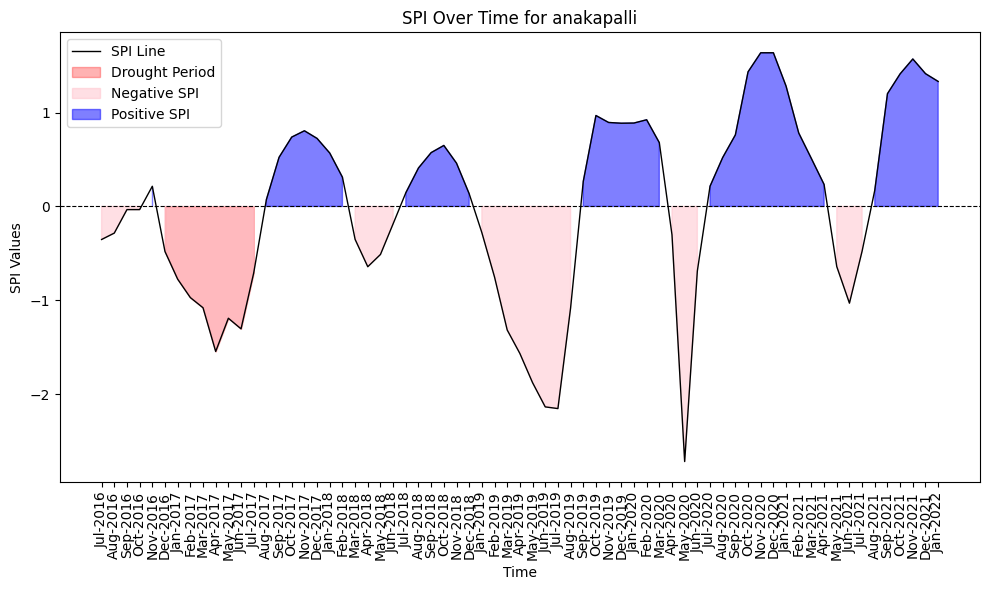

The largest drought period in anakapalli is from Dec-2016 till Jul-2017
0.007285226014741118 30


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


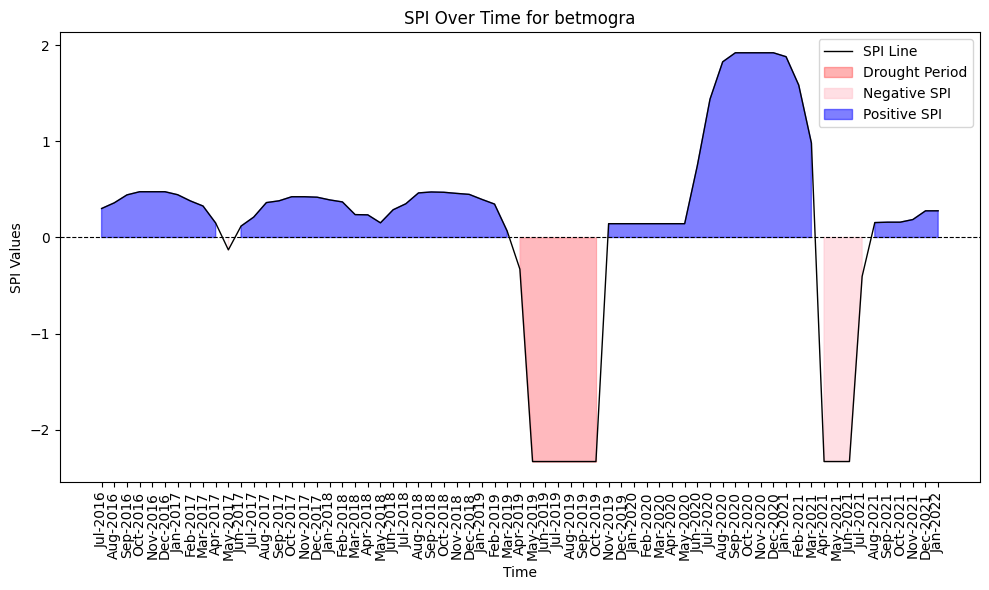

The largest drought period in betmogra is from Apr-2019 till Oct-2019
0.11733256458533244 12


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


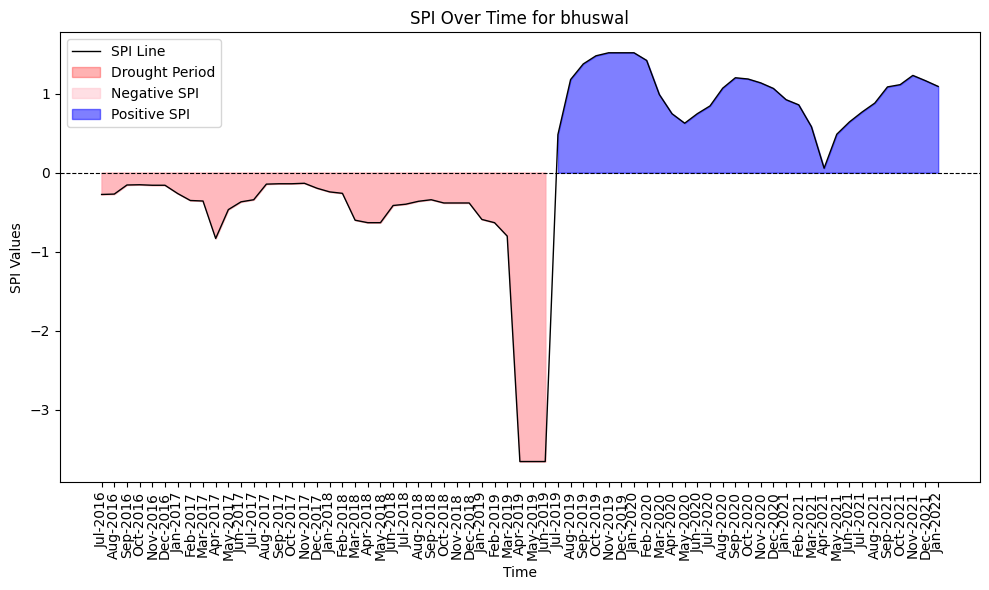

The largest drought period in bhuswal is from Jul-2016 till Jun-2019
0.12034788270637341 36


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


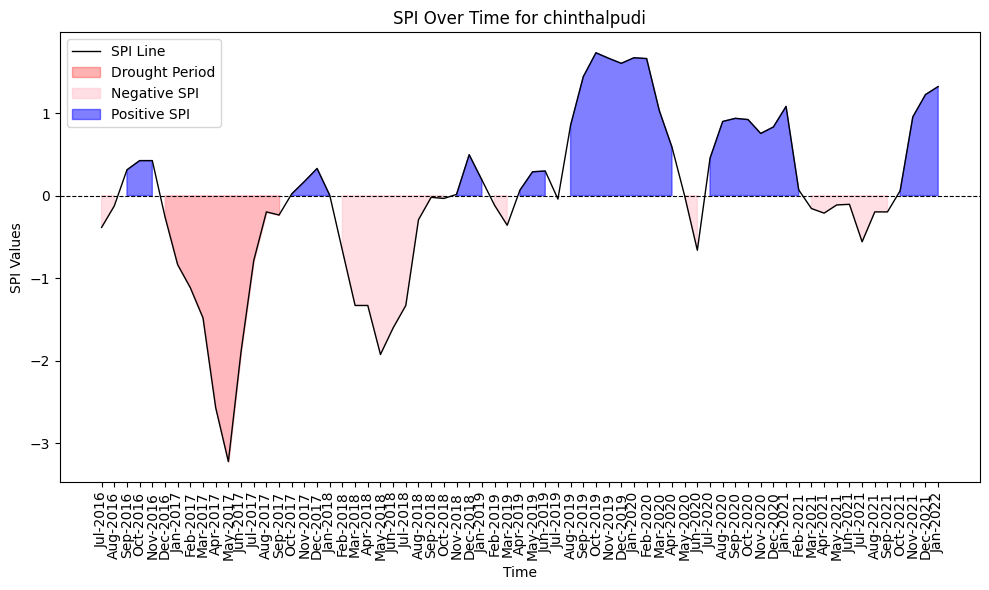

The largest drought period in chinthalpudi is from Dec-2016 till Sep-2017
0.0062234762751912556 33


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


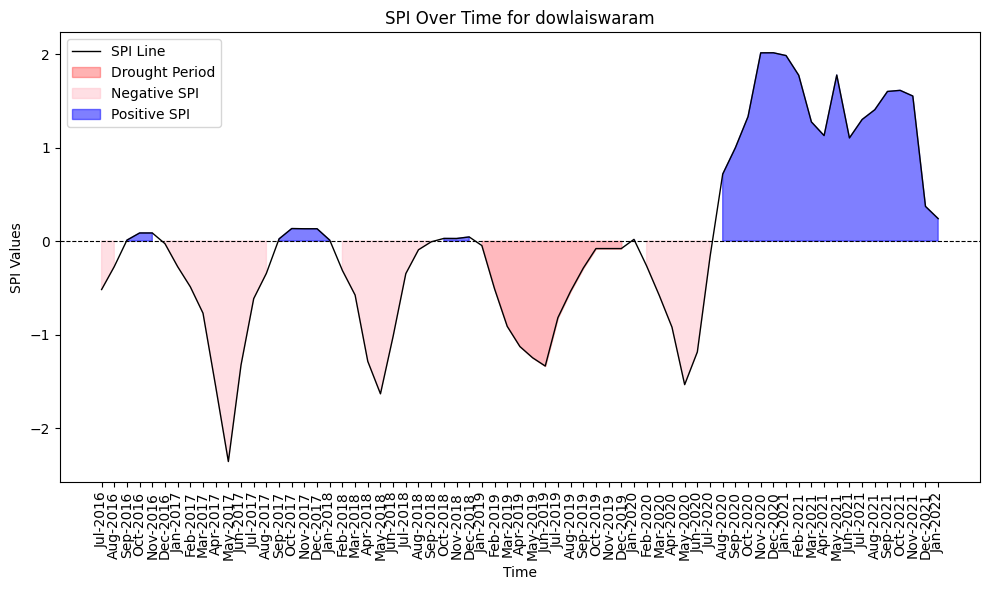

The largest drought period in dowlaiswaram is from Jan-2019 till Dec-2019
-0.009270411385331537 37


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


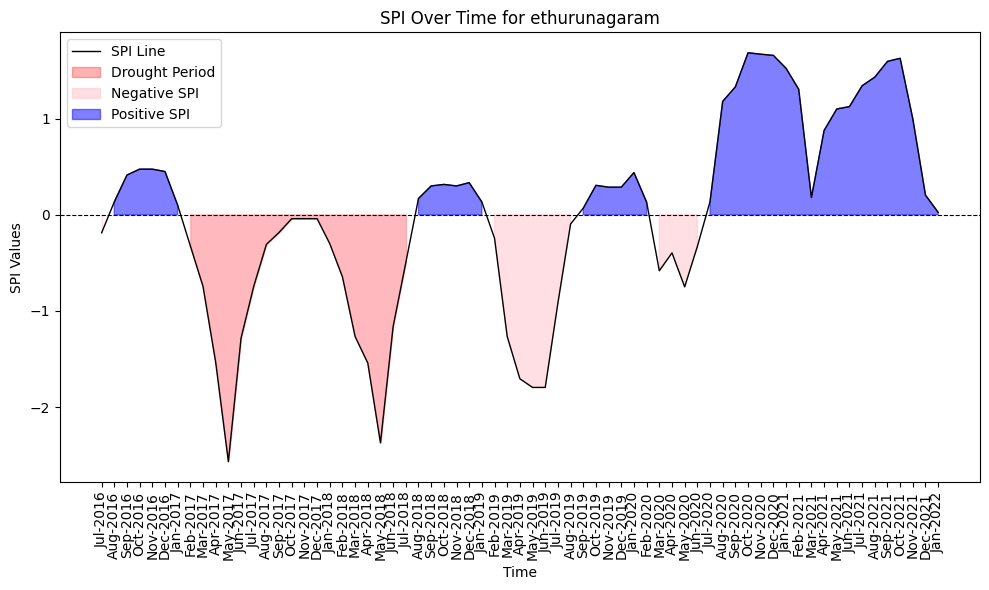

The largest drought period in ethurunagaram is from Feb-2017 till Jul-2018
0.00675274031188997 30


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


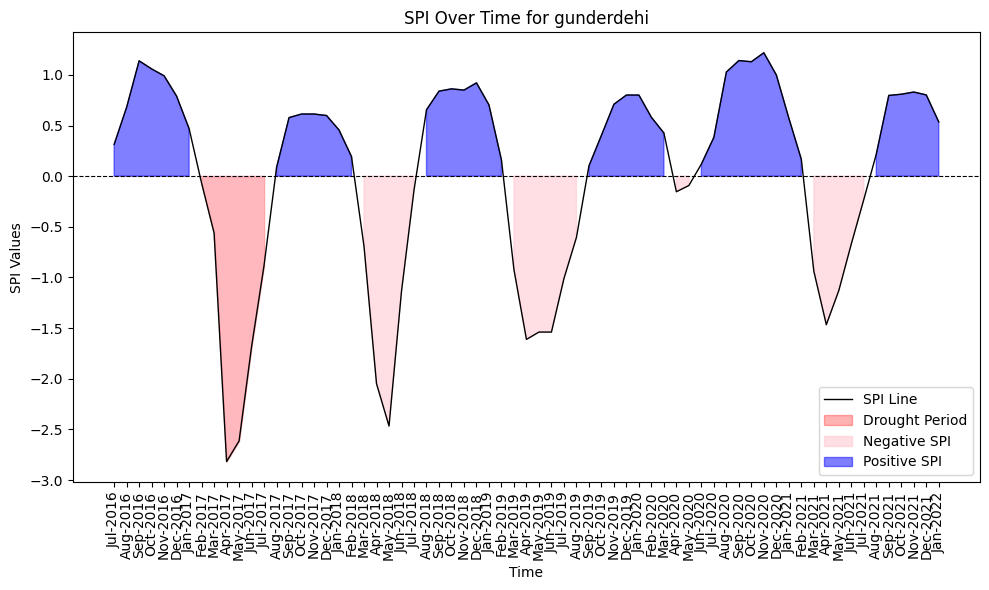

The largest drought period in gunderdehi is from Feb-2017 till Jul-2017
0.016808876144710154 24


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


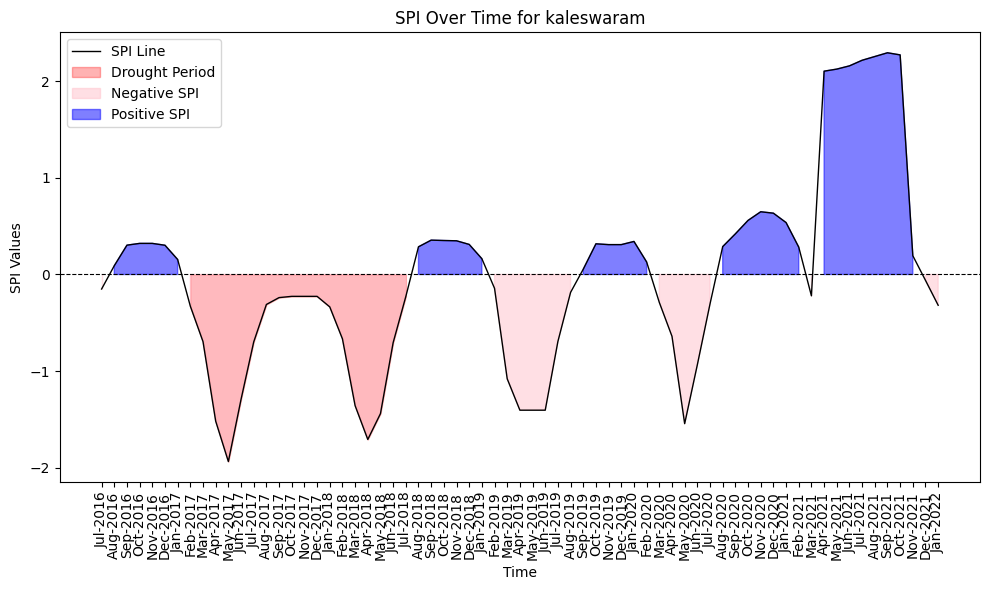

The largest drought period in kaleswaram is from Feb-2017 till Jul-2018
-0.017102371331919813 34


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


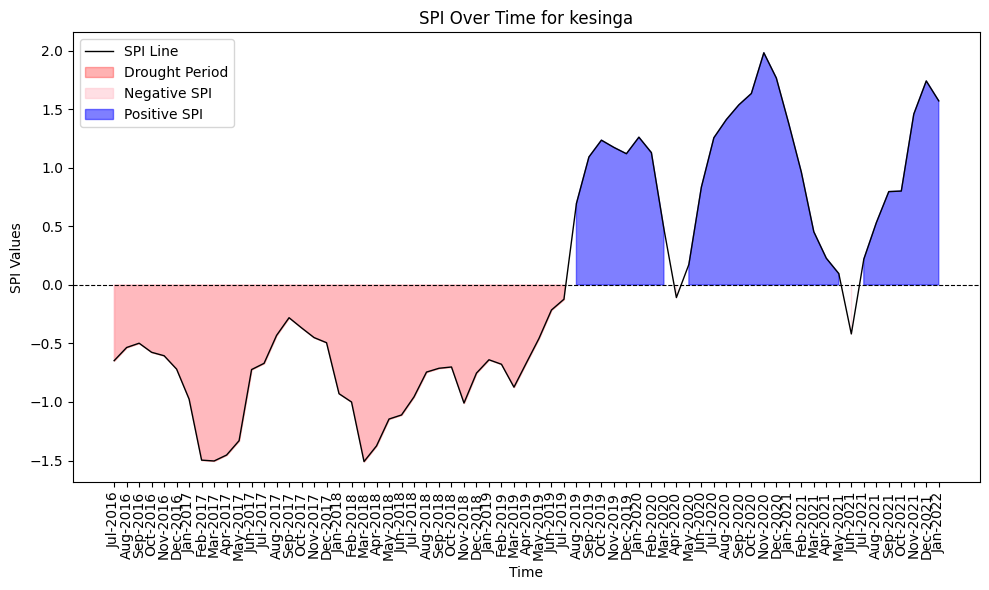

The largest drought period in kesinga is from Jul-2016 till Jul-2019
-0.01217336008194729 39


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


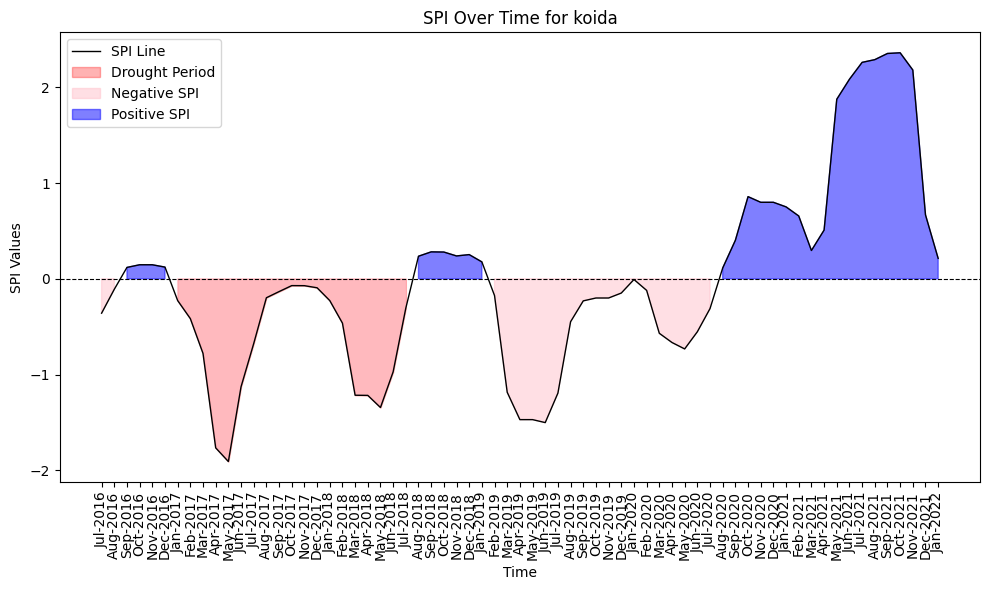

The largest drought period in koida is from Jan-2017 till Jul-2018
-0.021008422730279464 39


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


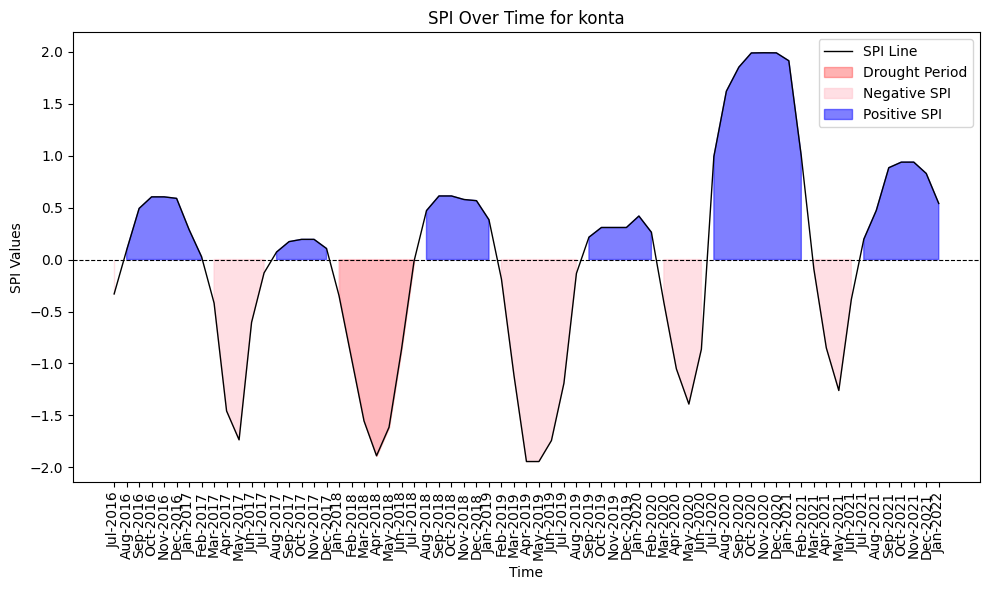

The largest drought period in konta is from Jan-2018 till Jul-2018
0.0020965069468744046 28


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


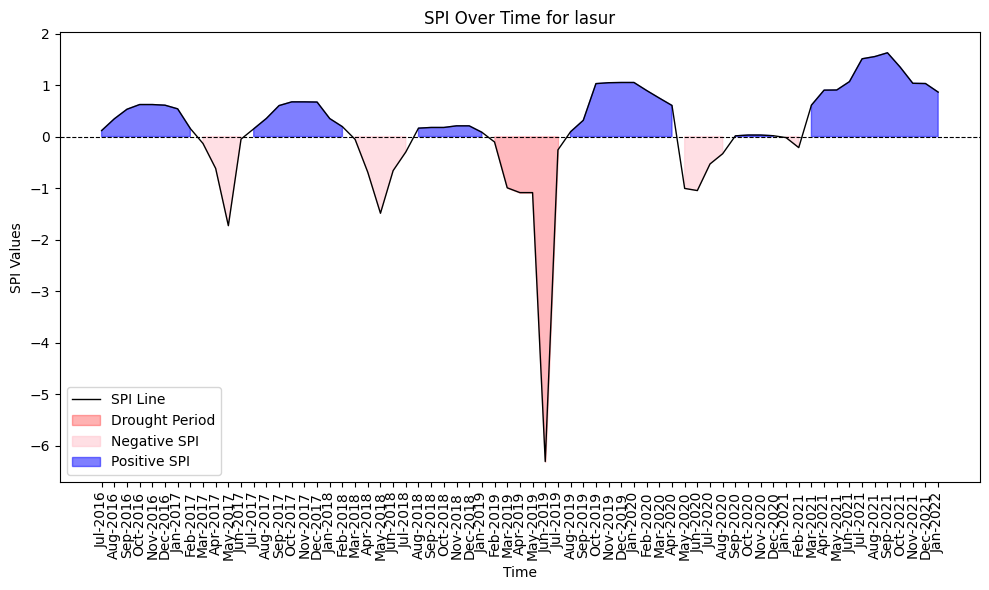

The largest drought period in lasur is from Feb-2019 till Jul-2019
0.13269992784803727 21


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


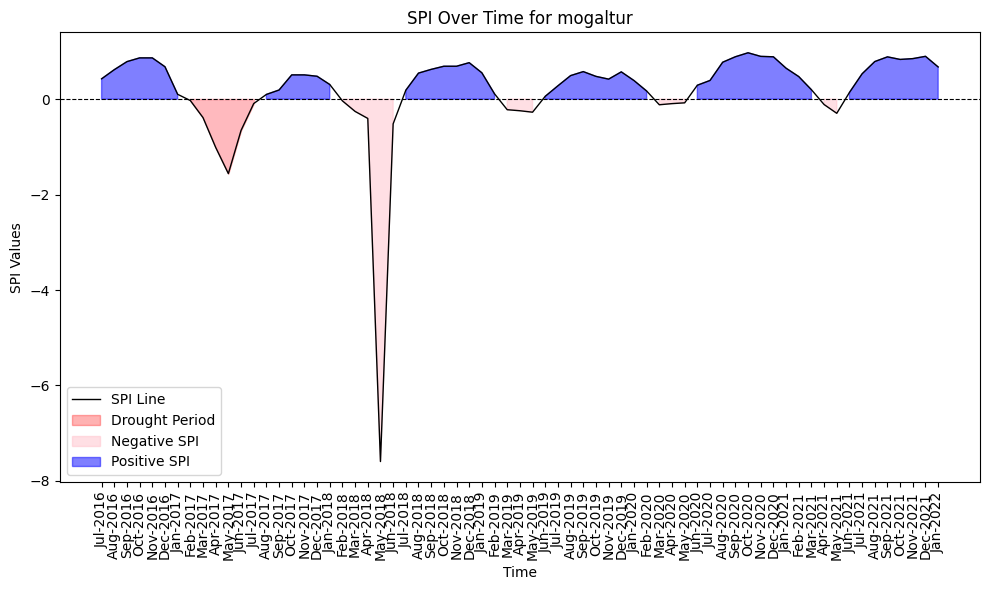

The largest drought period in mogaltur is from Feb-2017 till Jul-2017
0.18115110783453492 19


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


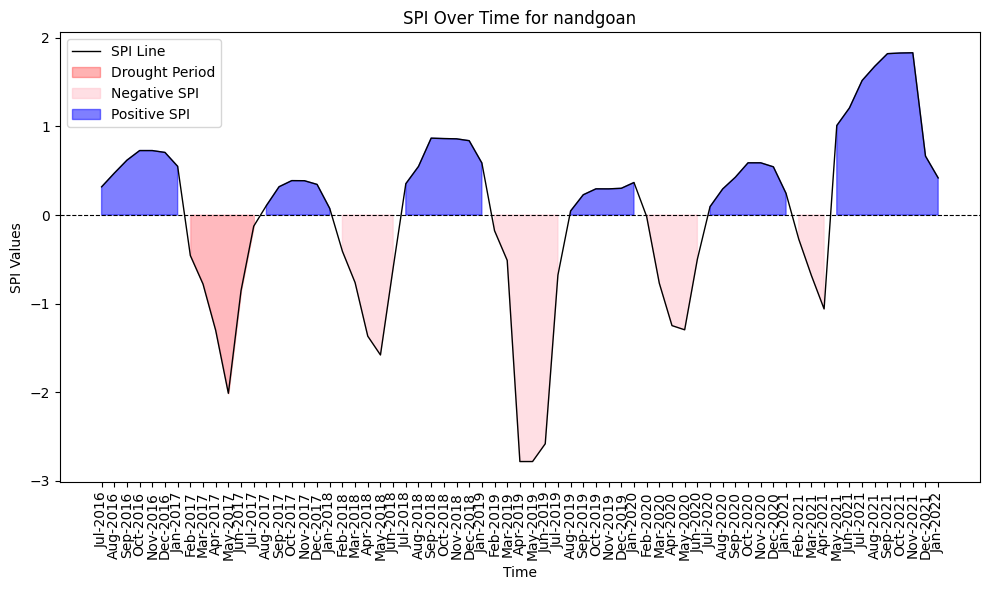

The largest drought period in nandgoan is from Feb-2017 till Jul-2017
0.02043749929357281 25


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


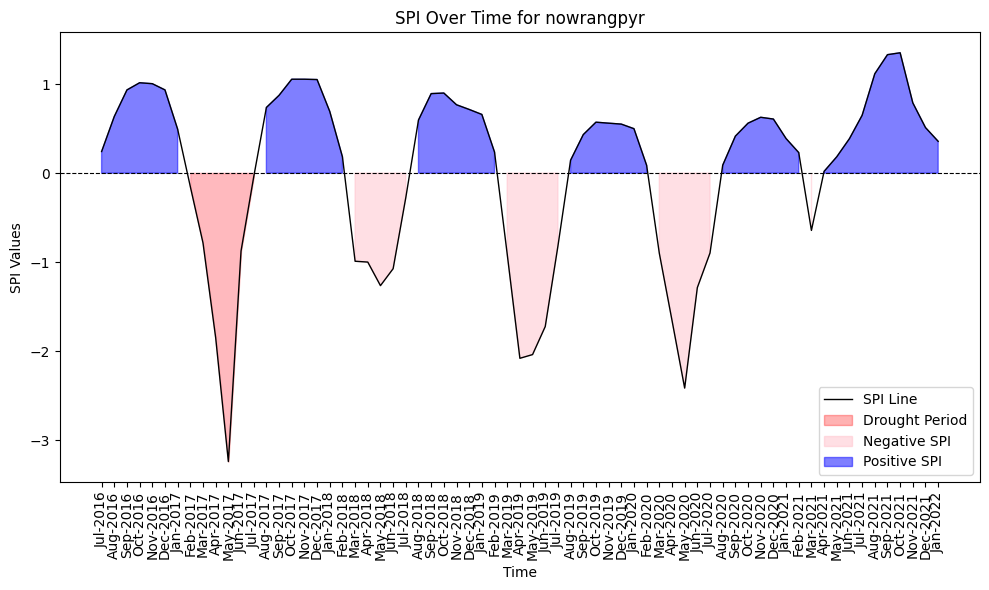

The largest drought period in nowrangpyr is from Feb-2017 till Jul-2017
0.018952137322945355 22


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


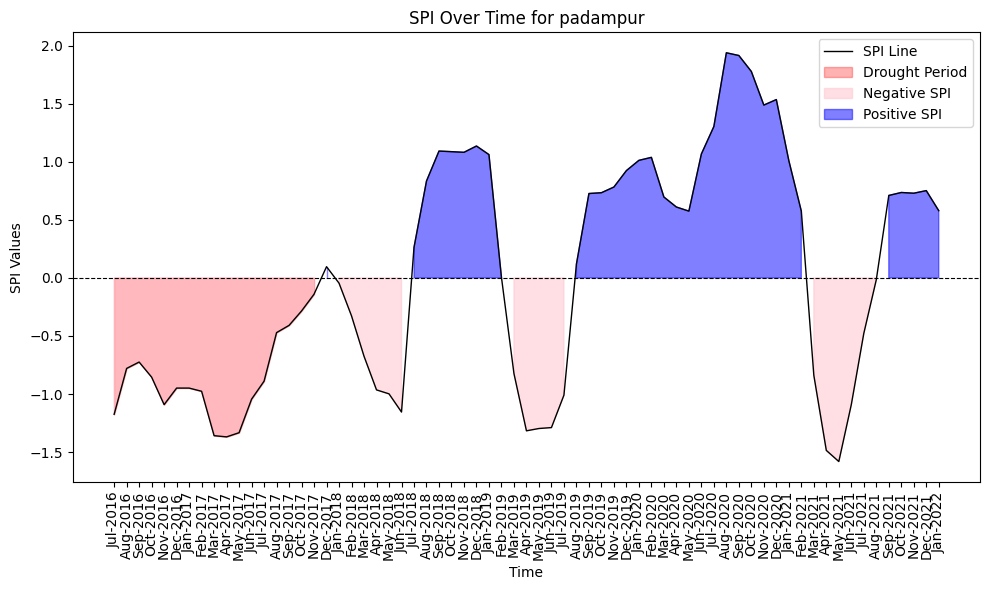

The largest drought period in padampur is from Jul-2016 till Nov-2017
-0.0029152400737815468 34


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


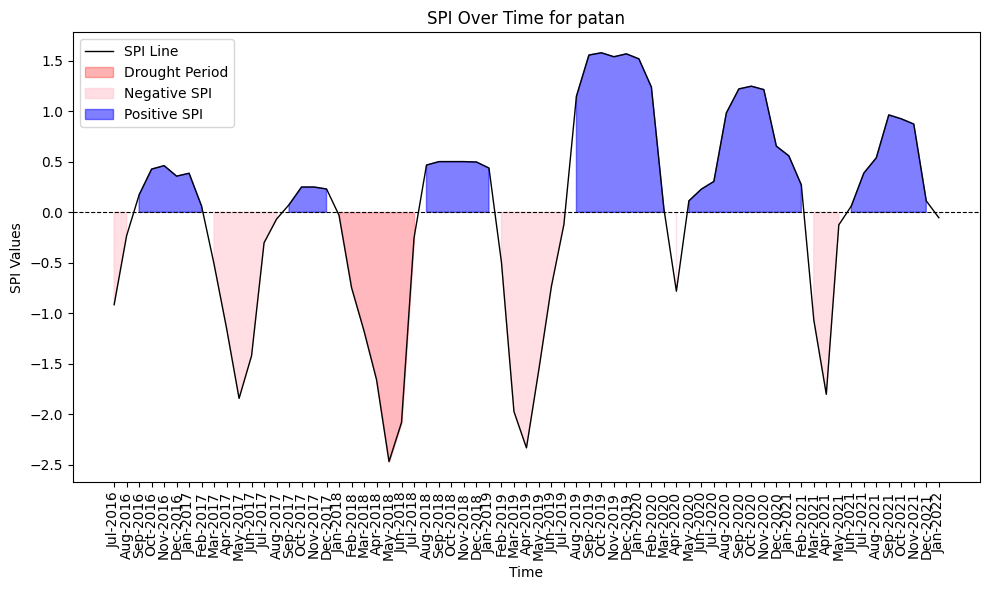

The largest drought period in patan is from Jan-2018 till Jul-2018
0.008648406877388493 26


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


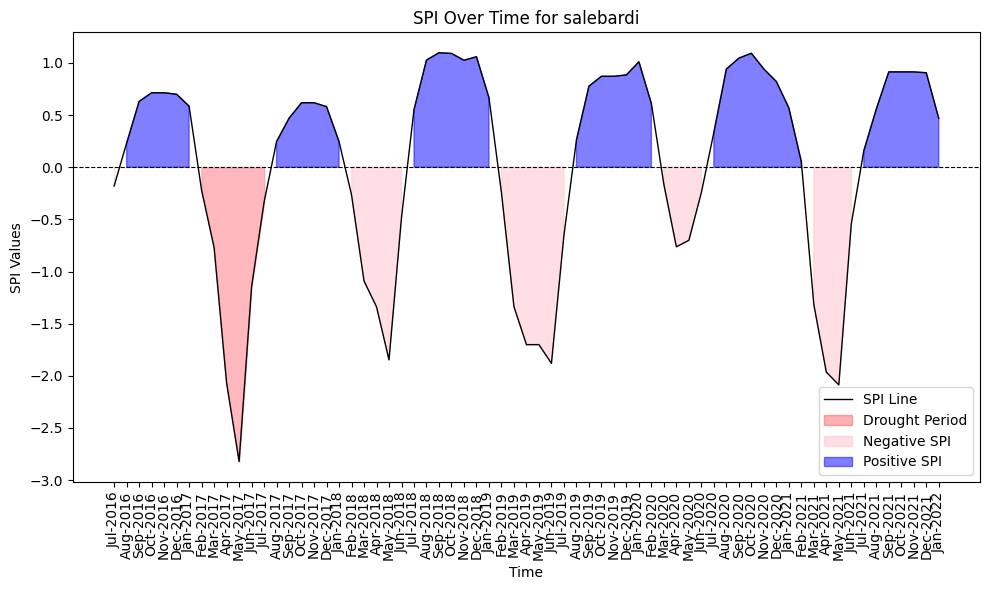

The largest drought period in salebardi is from Feb-2017 till Jul-2017
0.014374916938984164 26


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


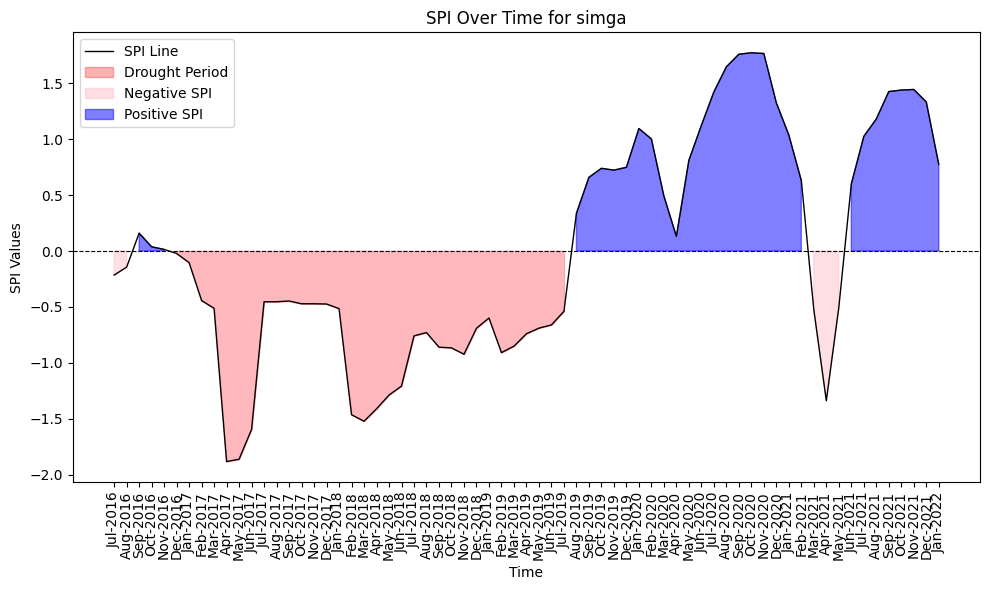

The largest drought period in simga is from Dec-2016 till Jul-2019
-0.0071343831084265084 37


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


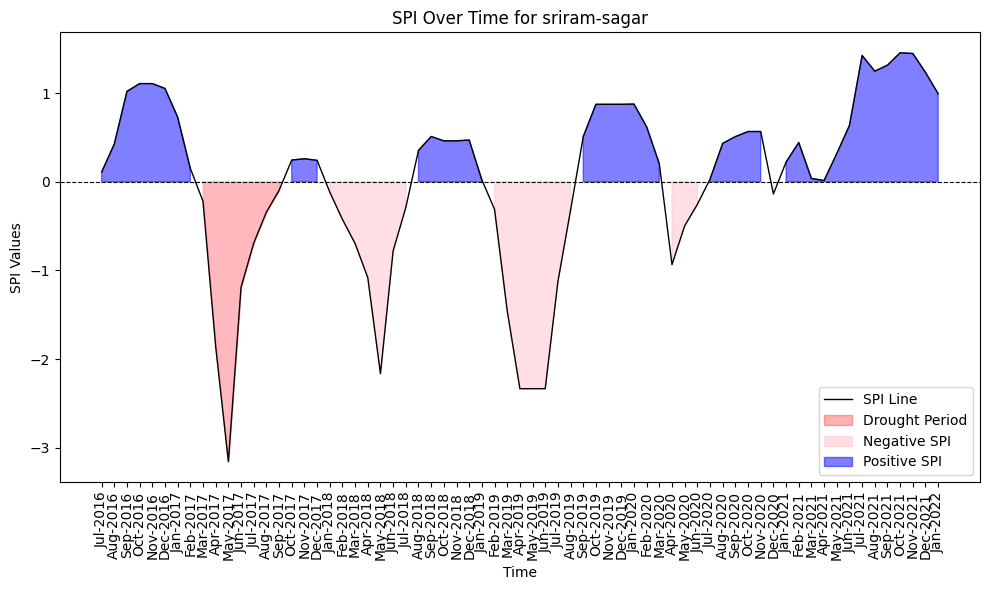

The largest drought period in sriram-sagar is from Mar-2017 till Sep-2017
0.01923868068841627 25


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


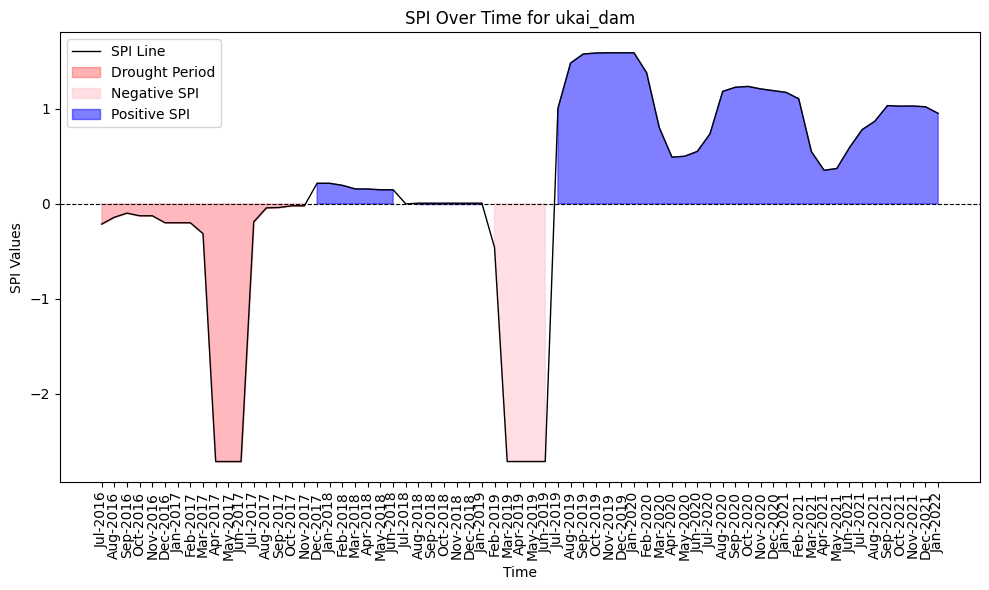

The largest drought period in ukai_dam is from Jul-2016 till Nov-2017
0.17482043764893715 23


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


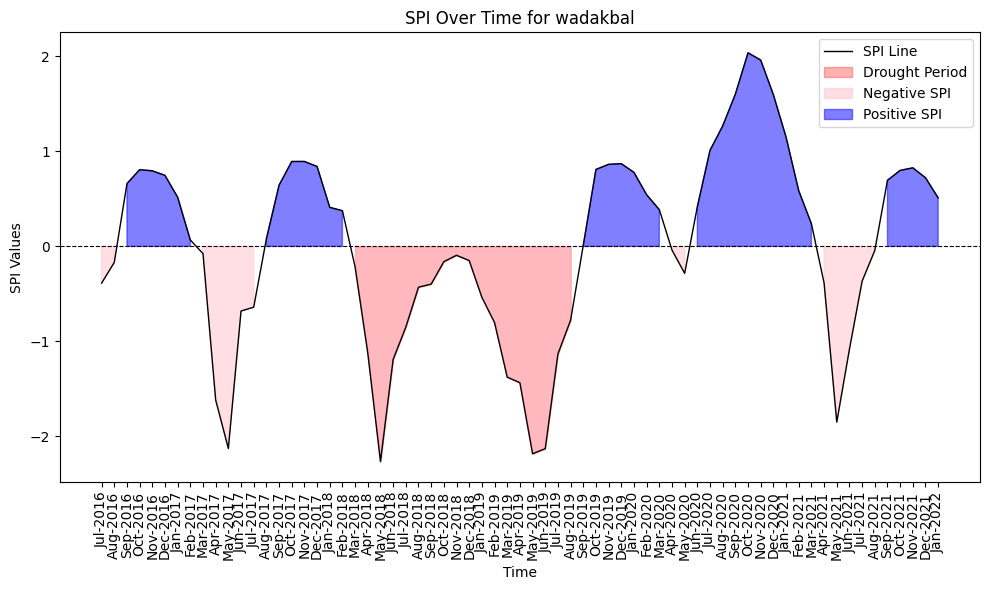

The largest drought period in wadakbal is from Mar-2018 till Aug-2019
0.006442699970487674 32


C:\Users\Rupas\AppData\Local\Temp\ipykernel_13992\4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


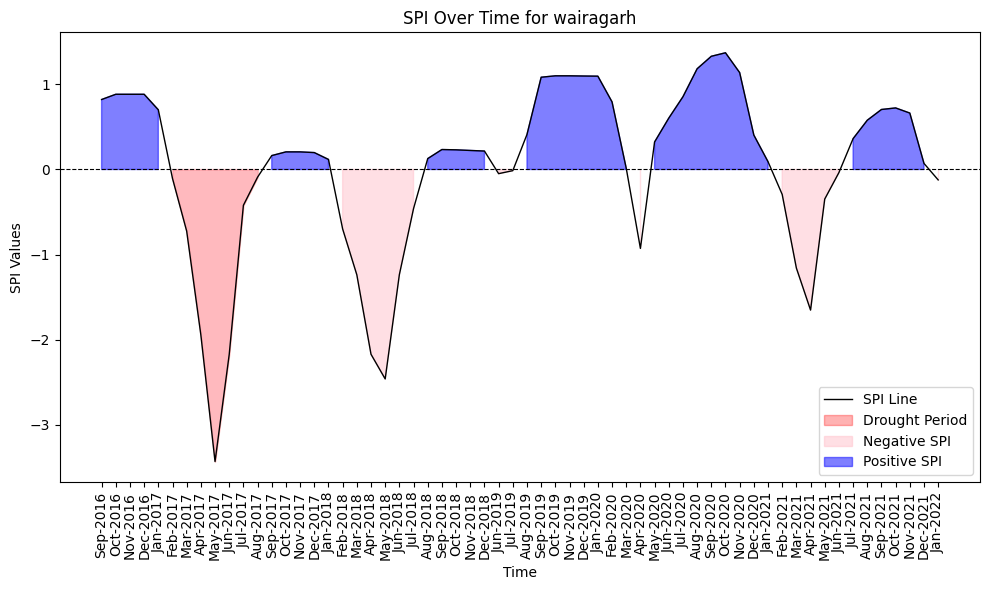

The largest drought period in wairagarh is from Feb-2017 till Aug-2017
0.02421591412386009 22


In [10]:
directory = './godavari_basins'
spi_means=[]
freqs=[]

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):
        spi_vals,date_objects= find_spi(filepath)
        file_name=os.path.splitext(filename)[0]
        plot_spi_with_drought_highlighted(spi_vals,date_objects,file_name)

        spi_mean=np.mean(spi_vals)
        drought_freq=np.sum(spi_vals < 0)

        print(spi_mean,drought_freq)
        spi_means.append(spi_mean)
        freqs.append(drought_freq)

freqs=np.array(freqs,dtype=float)        

In [11]:
print(freqs,spi_means)

[30. 12. 36. 33. 37. 30. 24. 34. 39. 39. 28. 21. 19. 25. 22. 34. 26. 26.
 37. 25. 23. 32. 22.] [0.007285226014741118, 0.11733256458533244, 0.12034788270637341, 0.0062234762751912556, -0.009270411385331537, 0.00675274031188997, 0.016808876144710154, -0.017102371331919813, -0.01217336008194729, -0.021008422730279464, 0.0020965069468744046, 0.13269992784803727, 0.18115110783453492, 0.02043749929357281, 0.018952137322945355, -0.0029152400737815468, 0.008648406877388493, 0.014374916938984164, -0.0071343831084265084, 0.01923868068841627, 0.17482043764893715, 0.006442699970487674, 0.02421591412386009]


In [12]:
position = {
    "betmogra.csv":(18.7034,77.5333),
    # "bhadrachalam.csv":(17.6705,80.8938),
    "bhuswal.csv":(21.06,71.78),
    "dowlaiswaram.csv":(16.9558,81.7927),
    "ethuranagaram.csv":(18.34,80.4281),
    # "hivra.csv":(20.54,78.32),
    "kaleswaram.csv":(18.8110,79.9067),
    "kesinga.csv":(20.28,83.22),
    "koida.csv":(17.47,81.39),
    "konta.csv":(17.82,81.39),
    "lasur.csv":(19.492,74.951),
    "nandgaon.csv":(20.52,78.8),
    "nowrangpyr.csv":(19.2,82.53),
    "patan.csv":(23.31,79.66),
    # "perur.csv":(18.55,80.39),
    "salebardi.csv":(20.91,79.93),
    "simga.csv":(21.63,81.68),
    "sriram-sagar.csv":(18.58,78.20),
    # "tumnar.csv":(19.01,81.23),
    "ukai_dam.csv":(21.25,73.59),
    "wadakbal.csv":(17.53,75.88),
    "wairagarh.csv":(20.43,80.10),
    "anakapalli":(17.68,82.99),
    "gunderdehi":(20.95,81.26),
    "padampur":(21.01,83.10),
    "mogaltur":(16.40,81.56),
    "chinthalpudi":(16.57,82.04)
}

latitudes = []
longitudes = []

for location, coordinates in position.items():
    latitudes.append(coordinates[0])
    longitudes.append(coordinates[1])



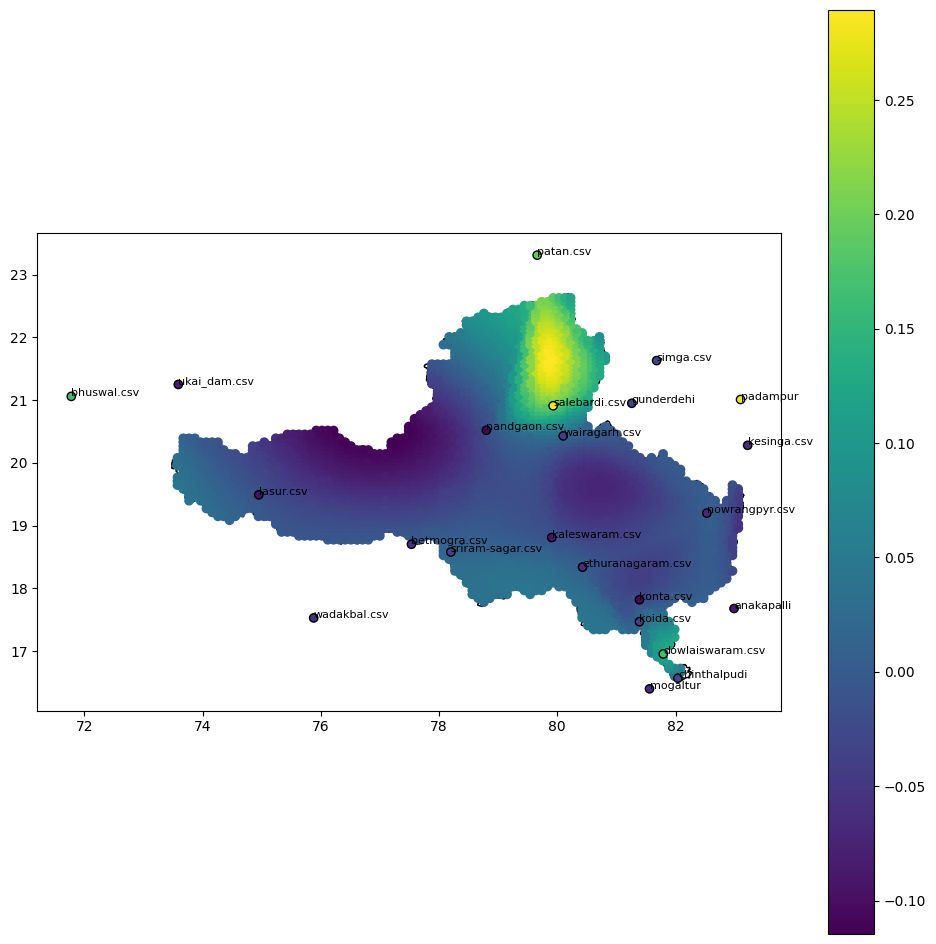

In [13]:
def load_shapefile(filepath):
    return gpd.read_file(filepath)

def calculate_grid(godavari_shapefile):

    basin_xmin, basin_ymin, basin_xmax, basin_ymax = godavari_shapefile.total_bounds
    x_temp=np.linspace(basin_xmin, basin_xmax, num=100)
    y_temp=np.linspace(basin_ymin, basin_ymax, num=100)
    x_grid, y_grid = np.meshgrid(x_temp, y_temp)
    return x_grid, y_grid

def interpolate_data(grid_x, grid_y):
    
    grid_z = griddata((longitudes, latitudes), spi_means, (grid_x, grid_y), method='cubic')
    return grid_z

def create_interpolated_grid(grid_x, grid_y, grid_z, godavari_shapefile):

    flattened_x = grid_x.flatten()
    flattened_y = grid_y.flatten()
    flattened_z = grid_z.flatten()

    # Create a GeoDataFrame from flattened data
    interpolated_grid = (
        gpd.GeoDataFrame(
            {'value': flattened_z},
            geometry=gpd.points_from_xy(flattened_x, flattened_y),
            crs=godavari_shapefile.crs
        )
    )
    clipped_interpolated_grid = interpolated_grid.clip(godavari_shapefile)

    return clipped_interpolated_grid

def plot_data(godavari_shapefile, clipped_interpolated_grid, position):
    
    fig, ax = plt.subplots(figsize=(12, 12))
    godavari_shapefile.plot(ax=ax, color='white', edgecolor='black')
    clipped_interpolated_grid.plot(column='value', ax=ax, legend=True)
    scatter = ax.scatter(longitudes, latitudes, c=spi_means, edgecolor='black', label='Data Points')
    for i, name in enumerate(position.keys()):
        ax.annotate(name, (longitudes[i], latitudes[i]), fontsize=8, ha='left')

    # legend = ax.legend(*scatter.legend_elements(), title='Value', loc='lower right')
    # ax.add_artist(legend)
    plt.show()
    
# Load the river basin shapefile
godavari_shapefile = load_shapefile("./godavari_shp.geojson")

# Calculate grid
grid_x, grid_y = calculate_grid(godavari_shapefile)

# Interpolate data
grid_z = interpolate_data(grid_x, grid_y)

# Create interpolated grid
clipped_interpolated_grid = create_interpolated_grid(grid_x, grid_y, grid_z, godavari_shapefile)

# Plot data
plot_data(godavari_shapefile, clipped_interpolated_grid, position)



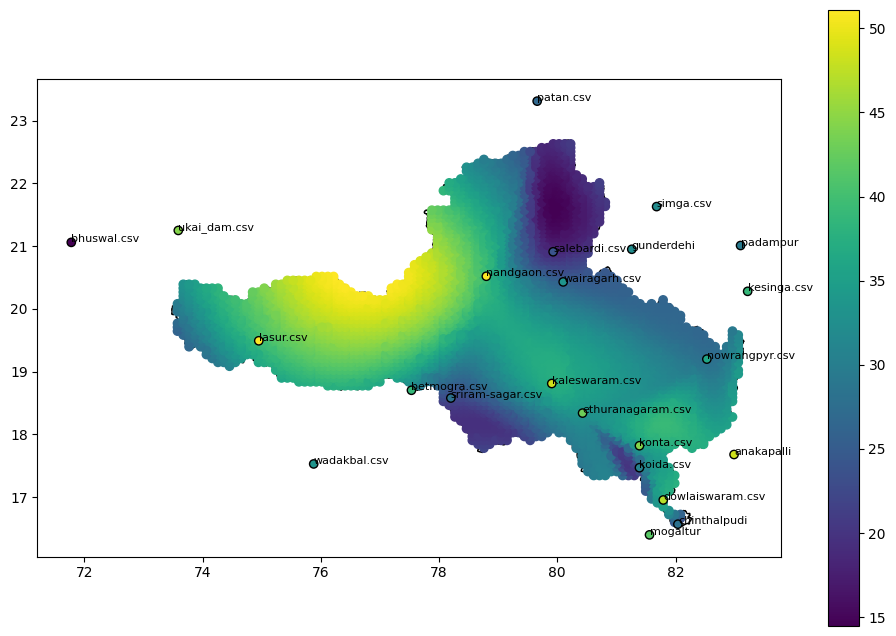

In [14]:
grid_z = griddata((longitudes, latitudes), freqs, (grid_x, grid_y), method='cubic')
interpolated_grid = gpd.GeoDataFrame(
    {'value': grid_z.flatten()},
    geometry=gpd.points_from_xy(grid_x.flatten(), grid_y.flatten()), crs=godavari_shapefile.crs
    )
clipped_interpolated_grid = gpd.clip(interpolated_grid, godavari_shapefile)

    # plt.figure(figsize=(12, 8))
godavari_shapefile.plot(figsize=(12, 8), color='white', edgecolor='black')
clipped_interpolated_grid.plot(column='value',  ax=plt.gca(), legend=True)
plt.scatter(longitudes, latitudes, c=freqs, edgecolor='black', label='Data Points')

for i, txt in enumerate(position.keys()):
    plt.annotate(txt, (longitudes[i], latitudes[i]), fontsize=8, ha='left')

plt.show()

Areal Extent vs TimeScale
